In [18]:
from os.path import split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [19]:
dataset=pd.read_csv('/content/Medical_Cost.csv')

In [20]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


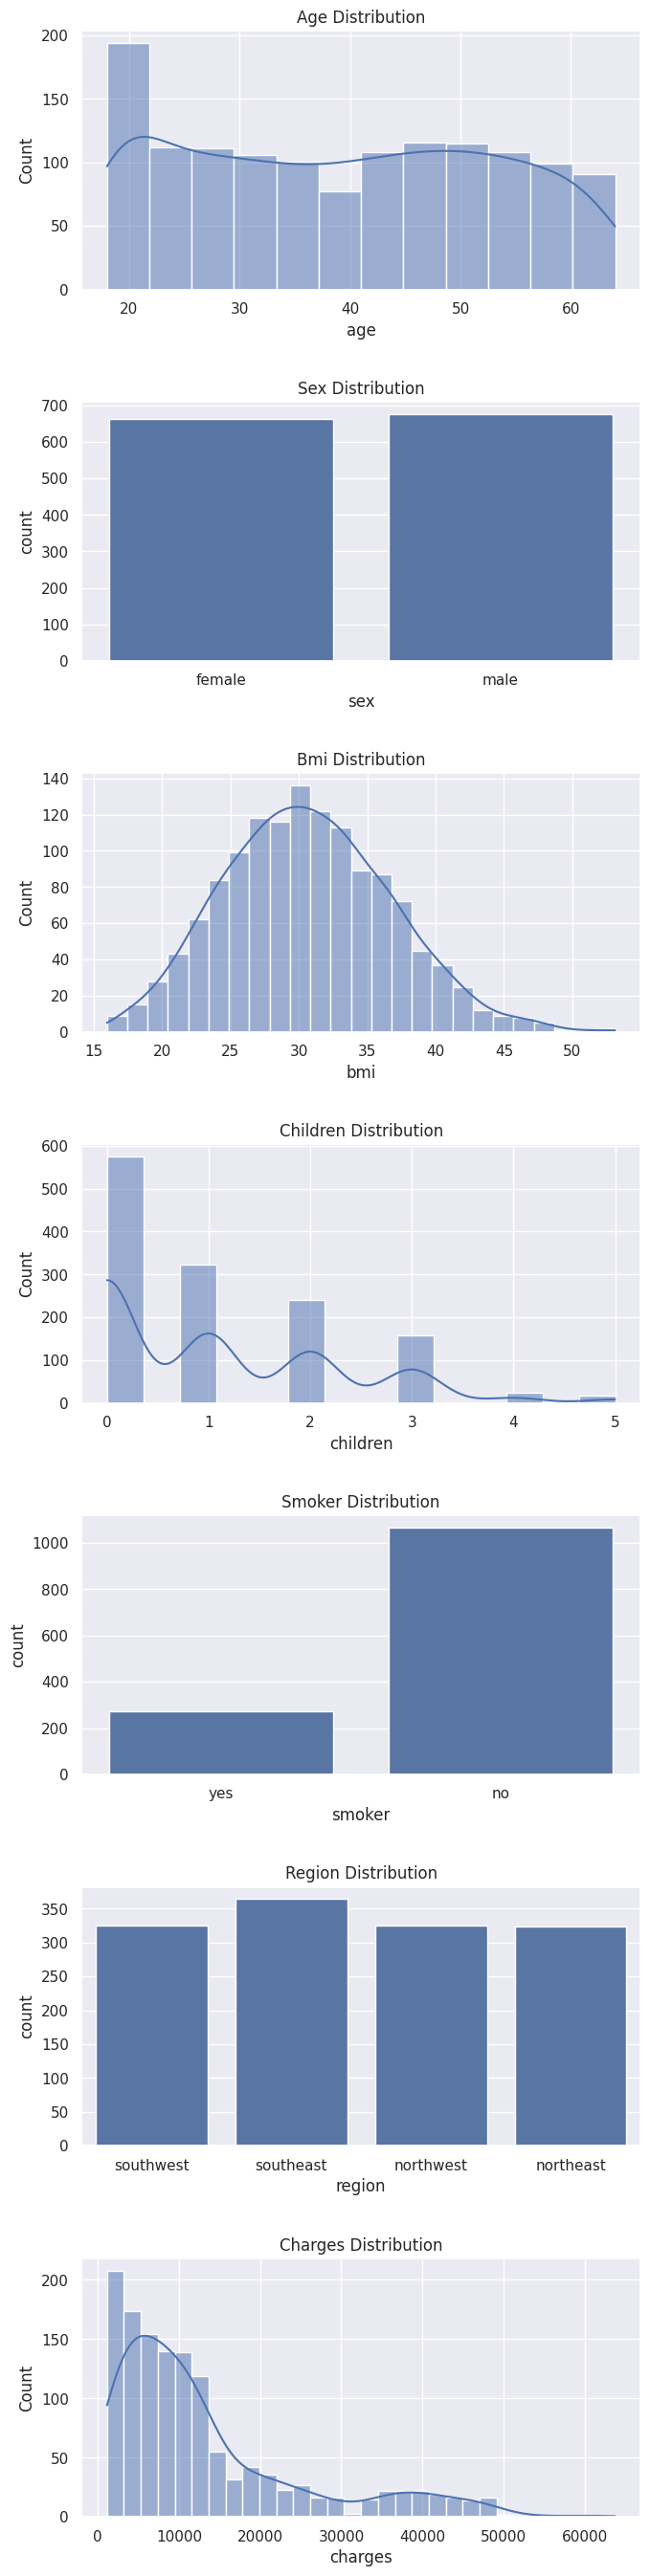

In [23]:
sns.set()
columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

fig, axes = plt.subplots(len(columns), 1, figsize=(8, 4 * len(columns)))
fig.tight_layout(pad=5.0)

for i, col in enumerate(columns):
    if col in ['sex', 'smoker', 'region']:
        sns.countplot(data=dataset, x=col, ax=axes[i])
    else:
        sns.histplot(data=dataset, x=col, kde=True, ax=axes[i])

    axes[i].set_title(f'{col.capitalize()} Distribution')

plt.show()

In [24]:
#encodeing of categorical data
dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

<ipython-input-24-b86224c59ded>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
<ipython-input-24-b86224c59ded>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
<ipython-input-24-b86224c59ded>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set

In [28]:
X=dataset.drop(columns='charges',axis=1)
Y=dataset['charges']

In [29]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [30]:
print(X)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [32]:
print(X.shape,X_train,X_test,Y_train,Y_test)

(1338, 6)       age  sex     bmi  children  smoker  region
882    21    1  22.135         0       1       2
505    37    0  30.875         3       1       3
798    58    1  33.100         0       1       1
792    22    1  23.180         0       1       2
201    48    1  32.230         1       1       0
...   ...  ...     ...       ...     ...     ...
466    60    1  28.700         1       1       1
299    48    1  28.880         1       1       3
493    61    0  43.400         0       1       1
527    51    1  25.800         1       1       1
1192   58    1  32.395         1       1       2

[1070 rows x 6 columns]       age  sex     bmi  children  smoker  region
17     23    0  23.845         0       1       2
1091   55    1  29.830         0       1       2
273    50    0  27.455         1       1       2
270    18    0  29.370         1       1       0
874    44    0  21.850         3       1       2
...   ...  ...     ...       ...     ...     ...
232    19    1  17.800         0  

In [33]:
model=LinearRegression()

In [34]:
model.fit(X_train,Y_train)

LinearRegression()

In [35]:
trained_data_prediction=model.predict(X_train)

In [36]:
r2_train = metrics.r2_score(Y_train, trained_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [37]:
test_data_prediction =model.predict(X_test)

In [39]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684076


In [43]:
input_data = (50,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[8536.77789372]
The insurance cost is USD  8536.777893720347


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
